In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import random
import time
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib

# National GB Demand - 2022

In [2]:
Demand_Data = pd.read_csv('demanddata.csv').values[:,2]

In [3]:
Demand_Data_Day_Hour = np.reshape(Demand_Data, [365,48])
Demand_Data_Daily_Mean = np.mean(Demand_Data_Day_Hour, axis=0)
#print(Demand_Data_Daily_Mean)
print(max(Demand_Data_Daily_Mean))
print(min(Demand_Data_Daily_Mean))

32952.120547945204
19958.43287671233


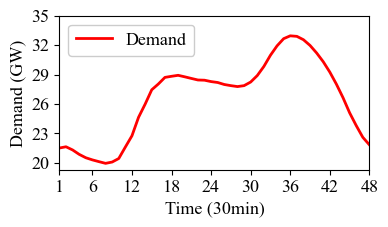

In [4]:
plt.figure(figsize=(4, 2))
x = range(48)
text1 = 13
text2 = 13
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text2}

plt.plot(x, Demand_Data_Daily_Mean, linewidth=2, color='r', label='Demand')
plt.tick_params(labelsize = text1)
plt.xlim(0,47)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],[1,6,12,18,24,30,36,42,48])
plt.yticks(np.linspace(20000,35000,6), fontname = "Times New Roman")
plt.yticks([20000,23000,26000,29000,32000,35000],[20,23,26,29,32,35])
plt.xlabel('Time (30min)', font1)
plt.ylabel("Demand (GW)", font1)
legend = plt.legend(loc='upper left', prop=font1, framealpha=1, ncol=1)

plt.savefig('GBDem.jpg', dpi=1800, bbox_inches='tight')
plt.show()

# PV Generation

In [5]:
PV_Data = pd.read_csv('PV_Live Historical Results.csv').values[:,-1]

In [ ]:
PV_Data_Day_Hour = np.reshape(PV_Data, [365,48])
PV_Data_Daily_Mean = np.mean(PV_Data_Day_Hour, axis=0) * 13861.203 #installed capacity
print(max(PV_Data_Daily_Mean))
print(min(PV_Data_Daily_Mean))

4906.546212633177
0.0


# Wind Data

In [10]:
WT_Data = pd.read_csv('GenerationbyFuelType_2022.csv').values[:,7]

In [11]:
WT_Data_Day_Hour = np.reshape(WT_Data, [365,48])
WT_Data_Daily_Mean = np.mean(WT_Data_Day_Hour, axis=0)
print(max(WT_Data_Daily_Mean))
print(min(WT_Data_Daily_Mean))

7364.016438356164
6703.4767123287675


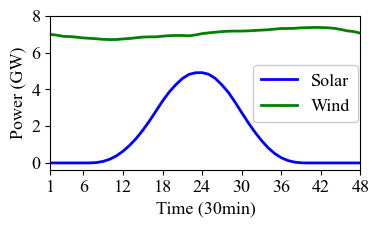

In [12]:
plt.figure(figsize=(4, 2))
x = range(48)
text1 = 13
text2 = 13
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text2}

plt.plot(x, PV_Data_Daily_Mean, linewidth=2, color='b', label='Solar')
plt.plot(x, WT_Data_Daily_Mean, linewidth=2, color='g', label='Wind')
plt.tick_params(labelsize = text1)
plt.xlim(0,47)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],[1,6,12,18,24,30,36,42,48])
plt.yticks(np.linspace(0,8000,5), fontname = "Times New Roman")
plt.yticks([0,2000,4000,6000,8000],[0,2,4,6,8])
plt.xlabel('Time (30min)', font1)
plt.ylabel("Power (GW)", font1)
legend = plt.legend(loc='lower right', prop=font1, framealpha=1, ncol=1, bbox_to_anchor=(1.02, 0.25))

plt.savefig('GBSolarWind.jpg', dpi=1800, bbox_inches='tight')
plt.show()

# Export Data to Excel

In [13]:
national_data = np.array([Demand_Data_Daily_Mean,WT_Data_Daily_Mean,PV_Data_Daily_Mean])
excel_national_data = pd.DataFrame(national_data)

In [14]:
with pd.ExcelWriter("national_data.xlsx") as writer:
    excel_national_data.to_excel(writer, sheet_name="dem_res", index=False)